# Problem Understanding & Project


* **Objective**:
This project analyzes student academic performance data, focusing on scores in Math, Science, and English.

* The goal is to identify trends and insights that can help improve student outcomes.






#Step 0: Import Librarys

In [55]:
# Library import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset

In [56]:
# Load the dataset
df = pd.read_csv("/content/student_performance_large_dataset.csv")

# Preview the data
df.head()


,student_id,name,gender,age,school,math_score,science_score,english_score,attendance_pct,extracurricular,parent_education,lunch_type,test_prep,total_score,average_score,grade
0,STU10000,Ishaan Bose,Male,19,City High,55.682978,60.930305,70.605439,73.840704,NaN,High School,Free,NaN,187.218722,62.406241,C
1,STU10001,Advait Banerjee,Female,18,Global Academy,50.855549,52.336149,75.059326,87.321220,Sports,Master,Paid,NaN,178.251024,59.417008,D
2,STU10002,Vivaan Reddy,Male,17,XYZ International,87.160588,86.062240,74.105284,78.336670,NaN,PhD,Free,Completed,247.328113,82.442704,A
3,STU10003,Advait Ghosh,Female,19,Global Academy,80.166455,86.587770,70.441265,98.410339,Music,High School,Free,NaN,237.195490,79.065163,B
4,STU10004,Ishaan Chakraborty,Female,19,Global Academy,84.110895,65.258916,77.383976,83.080528,Debate,Bachelor,Paid,NaN,226.753787,75.584596,B


#Data Cleaning & Preprocessing

In [57]:
# Select only required columns
df= df[['name', 'math_score', 'science_score', 'english_score']].copy()
df.columns = ['Name', 'Math', 'Science', 'English']

In [58]:
# Drop if all 3 subjects are missing
df.dropna(subset=['Math', 'Science', 'English'], how='all', inplace=True)

#Output Accuracy & Clarity

In [59]:
# Summary statistics
df.describe()

,Math,Science,English
count,4940.000000,4940.000000,4940.000000
mean,65.108031,68.010890,71.686530
std,14.977049,13.587603,12.014560
min,7.154370,16.828789,29.606182
25%,54.945552,58.481821,63.456253
50%,65.193989,68.169760,71.651996
75%,75.430728,77.377631,80.217268
max,100.000000,100.000000,100.000000


In [60]:
# Sample output
df.head()

,Name,Math,Science,English
0,Ishaan Bose,55.682978,60.930305,70.605439
1,Advait Banerjee,50.855549,52.336149,75.059326
2,Vivaan Reddy,87.160588,86.062240,74.105284
3,Advait Ghosh,80.166455,86.587770,70.441265
4,Ishaan Chakraborty,84.110895,65.258916,77.383976


#Logic Implementation

In [61]:
# Total, Average, Grade
df['Total'] = df[['Math', 'Science', 'English']].sum(axis=1)
df['Average'] = (df['Total'] / 3).round(2)

def assign_grade(avg):
    if avg >= 90: return 'A+'
    elif avg >= 80: return 'A'
    elif avg >= 70: return 'B'
    elif avg >= 60: return 'C'
    elif avg >= 50: return 'D'
    else: return 'F'

df['Grade'] = df['Average'].apply(assign_grade)

#Student Marks & Grades Summary

In [62]:
print("Student Marks & Grades Summary (First 5 Rows)")
print("=" * 80)
print(f"{'Name':<20}{'Math':<8}{'Science':<8}{'English':<8}{'Total':<8}{'Average':<8}{'Grade':<6}")
print("-" * 80)

for _, row in df.head().iterrows():
    print(
        f"{row['Name']:<20}"
        f"{row['Math']:<8.2f}"
        f"{row['Science']:<8.2f}"
        f"{row['English']:<8.2f}"
        f"{row['Total']:<8.2f}"
        f"{row['Average']:<8.2f}"
        f"{row['Grade']:<6}"
    )

Student Marks & Grades Summary (First 5 Rows)
Name                Math    Science English Total   Average Grade 
--------------------------------------------------------------------------------
Ishaan Bose         55.68   60.93   70.61   187.22  62.41   C     
Advait Banerjee     50.86   52.34   75.06   178.25  59.42   D     
Vivaan Reddy        87.16   86.06   74.11   247.33  82.44   A     
Advait Ghosh        80.17   86.59   70.44   237.20  79.07   B     
Ishaan Chakraborty  84.11   65.26   77.38   226.75  75.58   B     


#Visualization & EDA

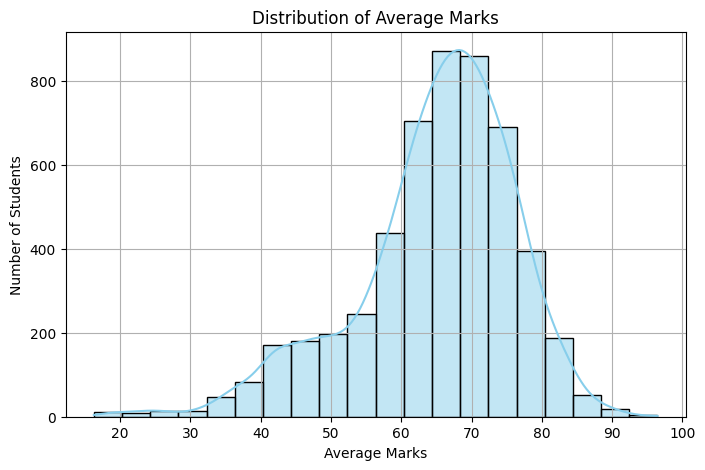

In [63]:
# 1. Histogram - Average Marks
plt.figure(figsize=(8, 5))
sns.histplot(df['Average'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Marks')
plt.xlabel('Average Marks')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

/tmp/ipython-input-4289661325.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Grade', data=df, palette='Set2', order=sorted(df['Grade'].unique()))


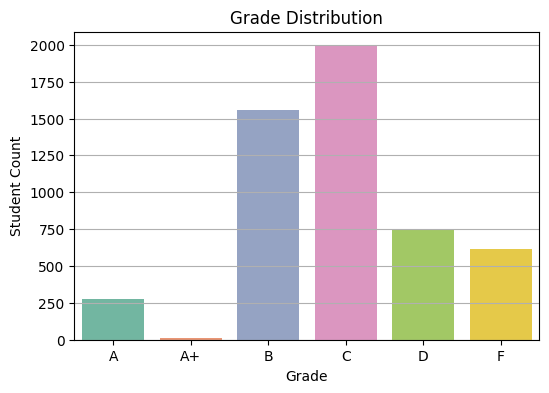

In [64]:
# 2. Countplot - Grade Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Grade', data=df, palette='Set2', order=sorted(df['Grade'].unique()))
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Student Count')
plt.grid(axis='y')
plt.show()

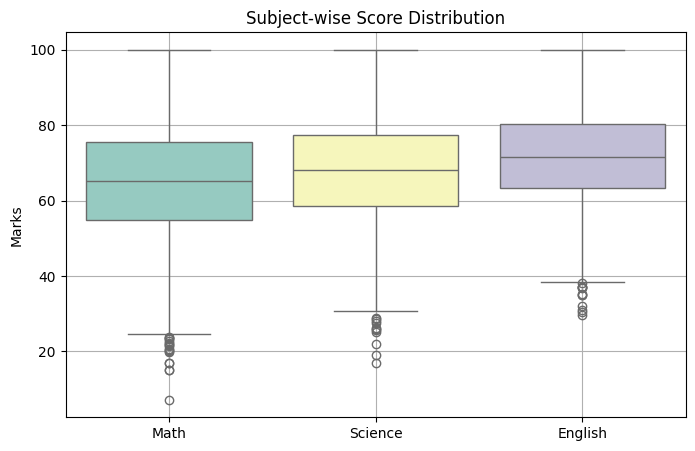

In [65]:
# 3. Boxplot - Subject-wise Score Spread
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['Math', 'Science', 'English']], palette='Set3')
plt.title('Subject-wise Score Distribution')
plt.ylabel('Marks')
plt.grid(True)
plt.show()

/tmp/ipython-input-9648823.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Name', data=top_10, palette='viridis')


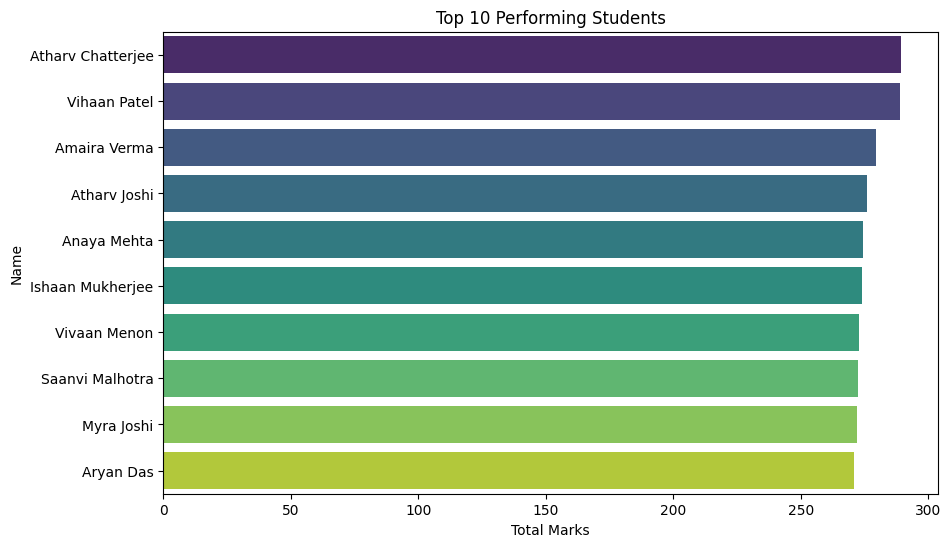

In [66]:
# 4. Barplot - Top 10 Students by Total Score
top_10 = df.nlargest(10, 'Total')
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='Name', data=top_10, palette='viridis')
plt.title('Top 10 Performing Students')
plt.xlabel('Total Marks')
plt.ylabel('Name')
plt.show()

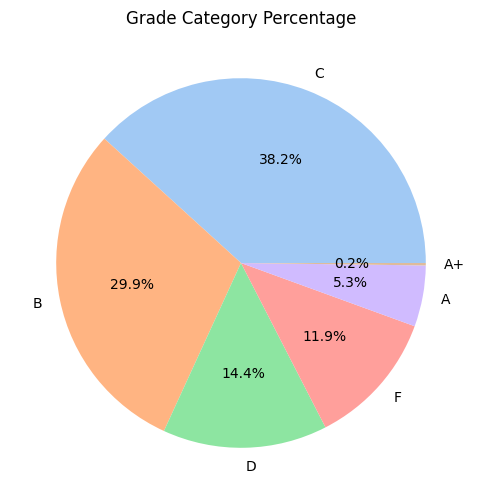

In [67]:
# 5. Pie Chart - Grade Category Proportion
plt.figure(figsize=(6, 6))
grade_counts = df['Grade'].value_counts()
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Grade Category Percentage')
plt.show()